# part 4

In [ ]:
Bernstein-Vazirani Algorithm
Written by Abraham Asfaw, IBM TJ Watson Research Center
In this episode of Coding with Qiskit, we learned about the Bernstein-Vazirani algorithm. Briefly, the Bernstein-Vazirani algorithm allows us to determine a secret number stored inside a box. Mathematically, the problem statement that we are solving is the following:

Consider a hidden Boolean function 
 which takes in a string of 
 bits 
 and returns 1 for only a unique n-bit string 
 and 0 otherwise.

How many attempts do we need to make in order to find the secret number 
?

Classically, we covered two approaches.

For an n-bit secret number, the first approach is to try all possible numbers from 0 to 
. This leads to an exponential number of attempts as 
 grows.

The second approach assumes that if the box isn't just giving a yes/no result if the number matches, but instead computes 
 modulo 2, (this is a yes/no result as well, but we are now computing the bitwise AND between the two numbers 
 and 
, and adding up the results, and finally returning the sum modulo 2) then we can be a bit more clever and give the box 
 different inputs (namely 
) to reveal each of its bits. Check out the video to see how this works. This method means that we would need to make 
 attempts to find the secret number.

The Bernstein-Vazirani algorithm allows us to find the secret number in 1 attempt, independent of the size of the secret number. For the mathematics behind how the algorithm works, check out the Bernstein-Vazirani section in our open-source Qiskit textbook.

The algorithm was described by Ethan Bernstein and Umesh Vazirani.

Link to Episode 6: https://www.youtube.com/watch?v=sqJIpHYl7oo

In [22]:
%matplotlib inline
from qiskit.tools.visualization import plot_histogram


In [26]:
secret_number = '101010'
n = len(secret_number)
circuit = QuantumCircuit(n+1,n)
circuit.h([0,1,2,3,4,5])

In [36]:
circuit.h(6)
circuit.x(6)
circuit.barrier()
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)
circuit.barrier()
circuit.draw()

┌───┐                ░            ░                 ░                     »
q_0: ┤ H ├────────────────░────────────░─────────────────░─────────────────────»
     ├───┤                ░            ░                 ░                     »
q_1: ┤ H ├────────────────░────────────░─────────────────░─────────────────────»
     ├───┤                ░            ░                 ░                     »
q_2: ┤ H ├────────────────░────────────░─────────────────░─────────────────────»
     ├───┤                ░            ░                 ░                     »
q_3: ┤ H ├────────────────░────────────░─────────────────░─────────────────────»
     ├───┤                ░            ░                 ░                     »
q_4: ┤ H ├────────────────░────────────░─────────────────░─────────────────────»
     ├───┤                ░            ░                 ░                     »
q_5: ┤ H ├────────────────░────────────░───■─────────────░───■────■────■────■──»
     ├───┤┌───┐┌───┐┌───┐ ░ ┌───┐┌───┐ ░ ┌─┴─┐┌───┐┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐»
q_6: ┤ H ├┤ X ├┤ H ├┤ X ├─░─┤ H ├┤ X ├─░─┤ X ├┤ H ├┤ X ├─░─┤ X ├┤ X ├┤ X ├┤ X ├»
     └───┘└───┘└───┘└───┘ ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘└───┘»
c: 6/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                     ░                                     ░                »
«q_0: ────────────────░─────────────■───────────────────────░─────────────■──»
«                     ░             │                       ░             │  »
«q_1: ────────────────░─────────────┼───────────────────────░─────────────┼──»
«                     ░             │                       ░             │  »
«q_2: ────────────────░─────────────┼───────────────────────░─────────────┼──»
«                     ░             │                       ░             │  »
«q_3: ────────────────░────────■────┼───────────────────────░────────■────┼──»
«                     ░        │    │                       ░        │    │  »
«q_4: ────────────────░────────┼────┼───────────────────────░────────┼────┼──»
«                     ░        │    │                       ░        │    │  »
«q_5: ──■─────────────░───■────┼────┼────■────■─────────────░───■────┼────┼──»
«     ┌─┴─┐┌───┐┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌───┐┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐»
«q_6: ┤ X ├┤ H ├┤ X ├─░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ H ├┤ X ├─░─┤ X ├┤ X ├┤ X ├»
«     └───┘└───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░ └───┘└───┘└───┘»
«c: 6/═══════════════════════════════════════════════════════════════════════»
«                                                                            »
«                ░                           ░                 ░ 
«q_0: ───────────░─────────────■─────────────░─────────────■───░─
«                ░             │             ░             │   ░ 
«q_1: ───────────░─────────────┼─────────────░─────────────┼───░─
«                ░             │             ░             │   ░ 
«q_2: ───────────░─────────────┼─────────────░─────────────┼───░─
«                ░             │             ░             │   ░ 
«q_3: ───────────░────────■────┼─────────────░────────■────┼───░─
«                ░        │    │             ░        │    │   ░ 
«q_4: ───────────░────────┼────┼─────────────░────────┼────┼───░─
«                ░        │    │             ░        │    │   ░ 
«q_5: ───────────░───■────┼────┼─────────────░───■────┼────┼───░─
«     ┌───┐┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌───┐┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
«q_6: ┤ H ├┤ X ├─░─┤ X ├┤ X ├┤ X ├┤ H ├┤ X ├─░─┤ X ├┤ X ├┤ X ├─░─
«     └───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░ 
«c: 6/═══════════════════════════════════════════════════════════
«

In [39]:
circuit.h([0,1,2,3,4,5])
circuit.barrier()
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.draw()


┌───┐                ░            ░                 ░                     »
q_0: ┤ H ├────────────────░────────────░─────────────────░─────────────────────»
     ├───┤                ░            ░                 ░                     »
q_1: ┤ H ├────────────────░────────────░─────────────────░─────────────────────»
     ├───┤                ░            ░                 ░                     »
q_2: ┤ H ├────────────────░────────────░─────────────────░─────────────────────»
     ├───┤                ░            ░                 ░                     »
q_3: ┤ H ├────────────────░────────────░─────────────────░─────────────────────»
     ├───┤                ░            ░                 ░                     »
q_4: ┤ H ├────────────────░────────────░─────────────────░─────────────────────»
     ├───┤                ░            ░                 ░                     »
q_5: ┤ H ├────────────────░────────────░───■─────────────░───■────■────■────■──»
     ├───┤┌───┐┌───┐┌───┐ ░ ┌───┐┌───┐ ░ ┌─┴─┐┌───┐┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐»
q_6: ┤ H ├┤ X ├┤ H ├┤ X ├─░─┤ H ├┤ X ├─░─┤ X ├┤ H ├┤ X ├─░─┤ X ├┤ X ├┤ X ├┤ X ├»
     └───┘└───┘└───┘└───┘ ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘└───┘»
c: 6/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«                     ░                                     ░                »
«q_0: ────────────────░─────────────■───────────────────────░─────────────■──»
«                     ░             │                       ░             │  »
«q_1: ────────────────░─────────────┼───────────────────────░─────────────┼──»
«                     ░             │                       ░             │  »
«q_2: ────────────────░─────────────┼───────────────────────░─────────────┼──»
«                     ░             │                       ░             │  »
«q_3: ────────────────░────────■────┼───────────────────────░────────■────┼──»
«                     ░        │    │                       ░        │    │  »
«q_4: ────────────────░────────┼────┼───────────────────────░────────┼────┼──»
«                     ░        │    │                       ░        │    │  »
«q_5: ──■─────────────░───■────┼────┼────■────■─────────────░───■────┼────┼──»
«     ┌─┴─┐┌───┐┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌───┐┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐»
«q_6: ┤ X ├┤ H ├┤ X ├─░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ H ├┤ X ├─░─┤ X ├┤ X ├┤ X ├»
«     └───┘└───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░ └───┘└───┘└───┘»
«c: 6/═══════════════════════════════════════════════════════════════════════»
«                                                                            »
«                ░                           ░                 ░ ┌───┐ ░ ┌───┐»
«q_0: ───────────░─────────────■─────────────░─────────────■───░─┤ H ├─░─┤ H ├»
«                ░             │             ░             │   ░ ├───┤ ░ ├───┤»
«q_1: ───────────░─────────────┼─────────────░─────────────┼───░─┤ H ├─░─┤ H ├»
«                ░             │             ░             │   ░ ├───┤ ░ ├───┤»
«q_2: ───────────░─────────────┼─────────────░─────────────┼───░─┤ H ├─░─┤ H ├»
«                ░             │             ░             │   ░ ├───┤ ░ ├───┤»
«q_3: ───────────░────────■────┼─────────────░────────■────┼───░─┤ H ├─░─┤ H ├»
«                ░        │    │             ░        │    │   ░ ├───┤ ░ ├───┤»
«q_4: ───────────░────────┼────┼─────────────░────────┼────┼───░─┤ H ├─░─┤ H ├»
«                ░        │    │             ░        │    │   ░ ├───┤ ░ ├───┤»
«q_5: ───────────░───■────┼────┼─────────────░───■────┼────┼───░─┤ H ├─░─┤ H ├»
«     ┌───┐┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌───┐┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░ └───┘»
«q_6: ┤ H ├┤ X ├─░─┤ X ├┤ X ├┤ X ├┤ H ├┤ X ├─░─┤ X ├┤ X ├┤ X ├─░───────░──────»
«     └───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░       ░      »
«c: 6/════════════════════════════════════════════════════════════════════════»
«    

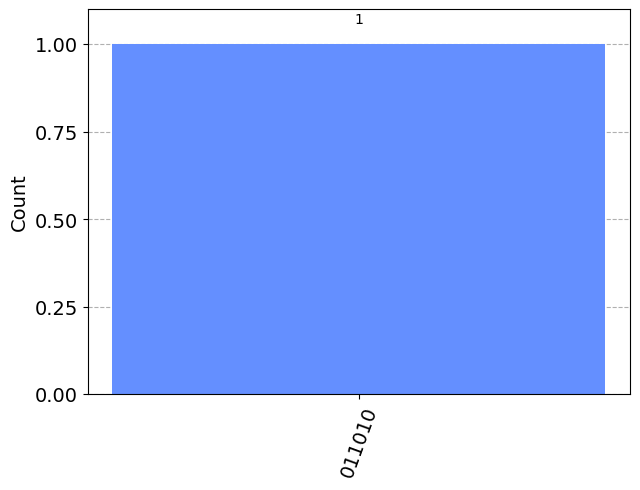

In [40]:
#And finally, let's simulate the circuit on Aer's qasm_simulator. We will set the number of shots to 1.

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))
counts=get_counts(circuit)

In [41]:
print(counts)

{'100': 228, '101': 265, '110': 264, '111': 243}


# New Section